## **Better Life Index (Machine Learning)**
The Better Life Index project aims to analyze and predict people’s life satisfaction levels based on various socio-economic indicators such as income, employment, education, and health. By using machine learning techniques, this project demonstrates how data-driven insights can help understand what truly influences happiness and well-being across different countries.

### **Importing Required Modules**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### **Downloading and Understanding the Data**

In [2]:
data_url = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_url + "lifesat/lifesat.csv")

lifesat.head(3)

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5


While seeing the data we can **GDP/capita of the country as compared to their life satisfaction**. Means there is a Economic relationship between the life of people with thier contry GDP. Let's plot some graph to visualize, if we can find some relationship...

In [ ]:
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

So our target value is Life satisfaction. And our input data is GDP per capita.

### **Visualize the Data**

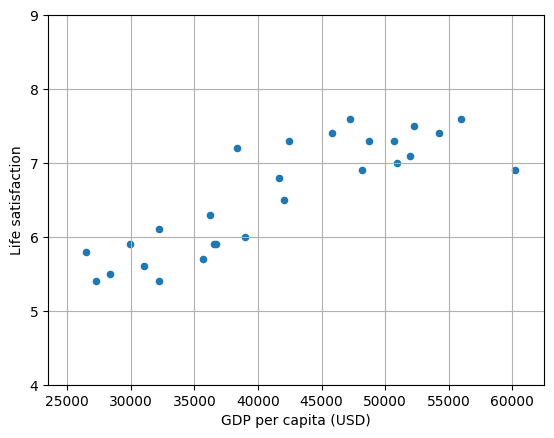

In [3]:
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

By **visualizing** the data, we can some level of **linear relationship** between the better life index with respect to the country GDP per capita. Here our best option is to train our model using **Linear regression** algorithm.

**Before starting training our Linear Regression Model, let's check if our Data is proper or not.**

1. Understand the Data
2. Check for Missing Values
3. Check for Duplicates
4. Check for Outliers
5. Check Correlation

In [7]:
# Understanding the Data

import pandas as pd

data_url = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_url + "lifesat/lifesat.csv")

lifesat.info()
lifesat.head()

# check for Null Data
lifesat.isnull().sum()

# Check for duplicate
lifesat.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               27 non-null     object 
 1   GDP per capita (USD)  27 non-null     float64
 2   Life satisfaction     27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 780.0+ bytes


np.int64(0)

**Observation**
1. 27 Records (From 27 countries)
2. No Null values
3. Country is Object(string)
4. Life satisfaction and GDP per capit is float value
5. No Duplicate Value

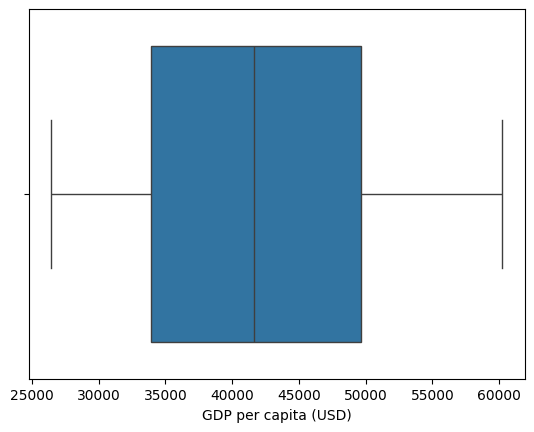

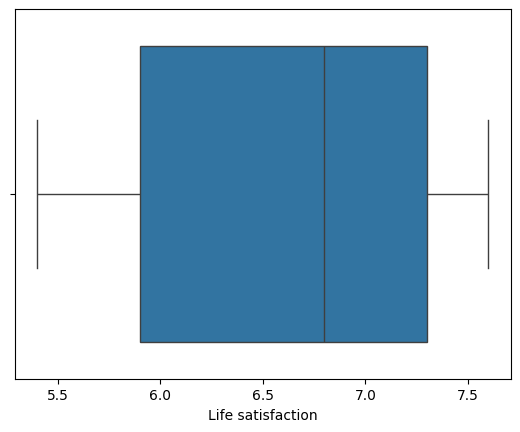

In [9]:
# Outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=lifesat["GDP per capita (USD)"])
plt.show()

sns.boxplot(x=lifesat["Life satisfaction"])
plt.show()



By observing the box plot we can see, there is no such outliers.

### **Training Model with Linear Regression Algorithm**

In [11]:
from sklearn.linear_model import LinearRegression

X = lifesat[["GDP per capita (USD)"]]   # Feature (independent variable)
y = lifesat["Life satisfaction"]        # Target (dependent variable)

model = LinearRegression()
model.fit(X, y)

LinearRegression()

Let us predict the life satisfaction of Cprus (38341)

In [21]:
X_new = pd.DataFrame({"GDP per capita (USD)": [38341]})
prediction = model.predict(X_new)
print(prediction)

[6.36666667]


### **Instance-Based Learning vs Model-Based Learning**

**Model-Based Learning**

We have trained a Linear Regression model that learned a mathematical relationship between GDP per capita and life satisfaction.

Once trained, the model summarizes that relationship in two parameters:

1. Slope (how much life satisfaction increases per GDP unit)
2. Intercept (baseline life satisfaction)

After training, it no longer needs the training data — it just uses the learned line equation.

In [14]:
# Check slope and intercept
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

Slope: 6.778899694341222e-05
Intercept: 3.7490494273769093


**Instance-Based Learning (k-Nearest Neighbors)**

Instead of learning a global formula, it memorizes the training data.
When you want to predict for a new country (say Cyprus):
1. It finds the k countries with the most similar GDP per capita.
2. It averages their life satisfaction values to predict Cyprus’s.


Let's Take an example of cyprus whose GDP per capita not available in our data. Current GDP per capita of cyprus is 38341. Let's check which country is near as compared to cyprus in term of GDP per capita.

In [17]:
cyprus_gdp = 38341

# Compute absolute difference from Cyprus GDP
lifesat['GDP_diff'] = abs(lifesat['GDP per capita (USD)'] - cyprus_gdp)

# Get 3 closest countries
closest_countries = lifesat.nsmallest(3, 'GDP_diff')

# Display only relevant columns
print(closest_countries[['Country', 'GDP per capita (USD)', 'Life satisfaction']])

      Country  GDP per capita (USD)  Life satisfaction
11     Israel          38341.307570                7.2
12      Italy          38992.148381                6.0
10  Lithuania          36732.034744                5.9


In contrast to Linear Regression, which learns a global relationship between GDP per capita and life satisfaction, instance-based learning algorithms like k-Nearest Neighbors (k-NN) regression make predictions by looking directly at the training data.

For example, suppose we want to predict Cyprus’ life satisfaction:
```
Cyprus GDP per capita ≈ $38,341

The closest country in the dataset is Israel
(GDP ≈ $37,494, Life satisfaction = 7.2)

Using just this nearest neighbor, we would predict 7.2 for Cyprus.
```

But Looking at the next two closest countries, we find:
```
Lithuania (GDP ≈ $38,000, Life satisfaction = 5.9)
Slovenia (GDP ≈ $39,000, Life satisfaction = 5.9)
```
By averaging the life satisfaction of these three nearest neighbors, we get:
```
Predicted Life Satisfaction = 7.2 + 5.9 + 5.9/3 ≈ 6.33
```
This is remarkably close to the prediction obtained from the linear regression model, showing that k-NN regression can capture local patterns in the data without assuming a linear relationship.

### **Training with Kth Nearest Neibour Algorithm**
Let's replace Linear Regression with Kth Nearest Neibour

In [18]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)

In [19]:
X = lifesat[["GDP per capita (USD)"]]   # Feature (independent variable)
y = lifesat["Life satisfaction"]        # Target (dependent variable)

model.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [20]:
X_new = pd.DataFrame({"GDP per capita (USD)": [38341]})
prediction = model.predict(X_new)
print(prediction)

[6.36666667]


**Observation:**

Both Linear Regression and k-NN regression give almost the same predicted life satisfaction (~6.3) for Cyprus.

- Linear Regression captures the general trend.
- k-NN captures local patterns around similar GDP countries.